In [1]:
pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 7.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 75 kB/s 
     |████████████████████████████████| 11.5 MB 48.0 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=b1ce69b92a0f6dc49d59675873bddfac9e0a53d483d41e8018247ece2f6f22a3
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into

In [2]:
pip install numpy==1.19.2

     |████████████████████████████████| 14.5 MB 33 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.1
    Uninstalling numpy-1.21.1:
      Successfully uninstalled numpy-1.21.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.3.1 requires numpy>=1.20.0, but you have numpy 1.19.2 which is incompatible.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
pip install pandas==1.1.0

     |████████████████████████████████| 10.5 MB 8.3 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.1
    Uninstalling pandas-1.3.1:
      Successfully uninstalled pandas-1.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.3.1 requires numpy>=1.20.0, but you have numpy 1.19.2 which is incompatible.
pyldavis 3.3.1 requires pandas>=1.2.0, but you have pandas 1.1.0 which is incompatible.


In [4]:
pip install folium==0.2.1

     |████████████████████████████████| 69 kB 4.8 MB/s 
  Created wheel for folium: filename=folium-0.2.1-py3-none-any.whl size=79808 sha256=4943793dc298a266bdde8d857a4686c1f3d91dcb8ddc9b7fad8bdf4af2fc5c92
  Stored in directory: /root/.cache/pip/wheels/9a/f0/3a/3f79a6914ff5affaf50cabad60c9f4d565283283c97f0bdccf
Successfully built folium
  Attempting uninstall: folium
    Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3


In [5]:
pip install imgaug==0.2.7

     |████████████████████████████████| 644 kB 9.6 MB/s 
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.7 which is incompatible.


In [6]:
pip install gensim

In [7]:
import pandas as pd
import numpy as np
import networkx as nx
import itertools
import collections
import spacy
from pprint import pprint

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis
import pyLDAvis.gensim_models
import pyLDAvis.gensim_models as gensimvis

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import subprocess
from gensim.models.wrappers import LdaMallet

# NLTK
from nltk import bigrams
from nltk.stem import PorterStemmer

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()
/usr/local/lib/python3.7/dist-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]


### Import Pre-Processed Data

In [8]:
df = pd.read_pickle('/content/drive/MyDrive/Capstone_electriccar/pre-processed.pkl')

In [9]:
df.shape

(36308, 7)

In [10]:
# iterating the columns
for col in df.columns:
    print(col)

Tweet Text
Hashtag
Location
tidy_tweet
tidy_tweet_tokens
tokens_no_stop
no_stop_joined


In [11]:
print(df.head(10))

                                          Tweet Text  ...                                     no_stop_joined
0  Join our next webinar on 'Alternative Fuel Typ...  ...  join next webinar alternative fuel type transp...
1  RT @events_wisdom: How the #hydrogen productio...  ...  production techniques impacting hydrogen econo...
2  How the #hydrogen production techniques are im...  ...  production techniques impacting hydrogen econo...
3  RT @events_wisdom: Join our upcoming event to ...  ...  join upcoming event hear robert paulnsteiner h...
4  RT @HELLENICSHIP: Stena Line achieves another ...  ...  stena line achieves another world first using ...
5  Stena Line achieves another world first using ...  ...  stena line achieves another world first using ...
6  Join our upcoming event to hear from Robert Pa...  ...  join upcoming event hear robert paulnsteiner h...
7  RT @Discover_Cement: What is the status on #al...  ...  status cement production utilisation lacking b...
8  England's first 

### Bigrams


In [12]:
# Create list of lists containing bigrams in tweets
terms_bigram = [list(bigrams(tweet)) for tweet in df['tokens_no_stop']]

# View bigrams for the first tweet
terms_bigram[0]

[('join', 'next'),
 ('next', 'webinar'),
 ('webinar', 'alternative'),
 ('alternative', 'fuel'),
 ('fuel', 'type'),
 ('type', 'transportation'),
 ('transportation', 'sectors'),
 ('sectors', 'well'),
 ('well', 'aligned'),
 ('aligned', 'strea')]

In [13]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

In [14]:
# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

In [15]:
bigram_df = pd.DataFrame(bigram_counts.most_common(25), columns=['bigram', 'count'])

In [16]:
len(bigram_counts)


125528

In [17]:
print(bigram_df.head(25))

                    bigram  count
0             (elon, musk)    668
1      (electric, vehicle)    369
2     (electric, vehicles)    341
3          (self, driving)    320
4           (tesla, model)    303
5     (charging, stations)    243
6        (happy, birthday)    221
7           (model, plaid)    220
8          (green, energy)    201
9        (currently, doge)    188
10            (doge, rate)    188
11        (tsla, winnings)    178
12     (winnings, initial)    178
13   (initial, investment)    178
14  (investment, realized)    178
15  (realized, estimating)    178
16   (estimating, average)    178
17           (rate, model)    149
18          (model, costs)    149
19        (electric, cars)    146
20     (renewable, energy)    146
21        (average, price)    138
22           (long, range)    123
23         (good, project)    121
24          (strong, team)    115


Number of Bigrams Identified 25


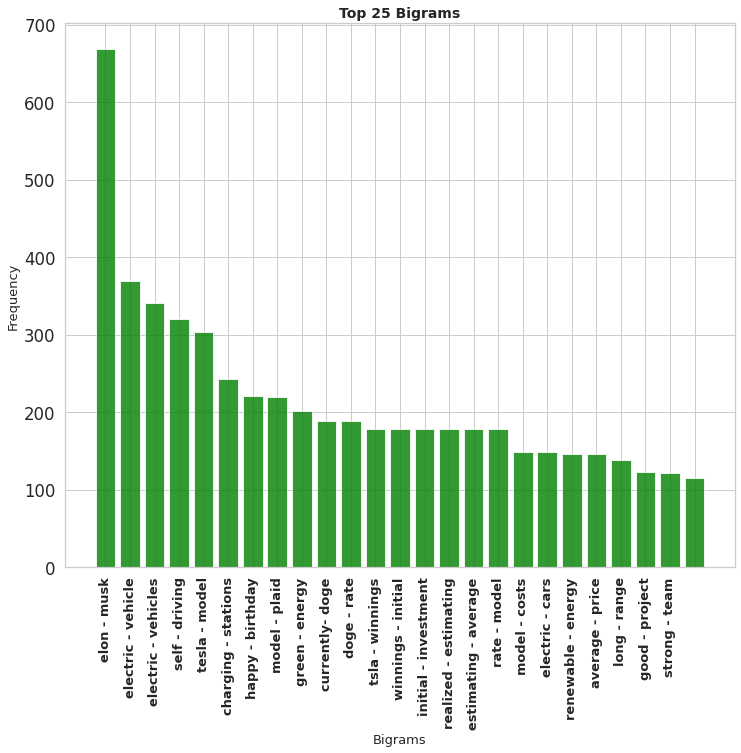

In [18]:
bigram_label = ['elon - musk','electric - vehicle', 'electric - vehicles', 'self - driving','tesla - model',
                'charging - stations', 'happy - birthday','model - plaid','green - energy','currently- doge',
                'doge - rate','tsla - winnings','winnings - initial', 'initial - investment','realized - estimating',
                'estimating - average','rate - model','model - costs','electric - cars','renewable - energy',
                'average - price','long - range','good - project','strong - team']
bigram_freq = bigram_df['count'].head(25)
index = np.arange(len(bigram_freq))

print("Number of Bigrams Identified", len(bigram_df))
plt.figure(figsize=(12,10))
plt.bar(index, bigram_freq, alpha=0.8, color= 'green')
plt.xlabel('Bigrams', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.xticks(index, bigram_label, fontsize=13, rotation=90, fontweight="bold") 
plt.title('Top 25 Bigrams', fontsize=14, fontweight="bold")
plt.show()

## visualize bigrams

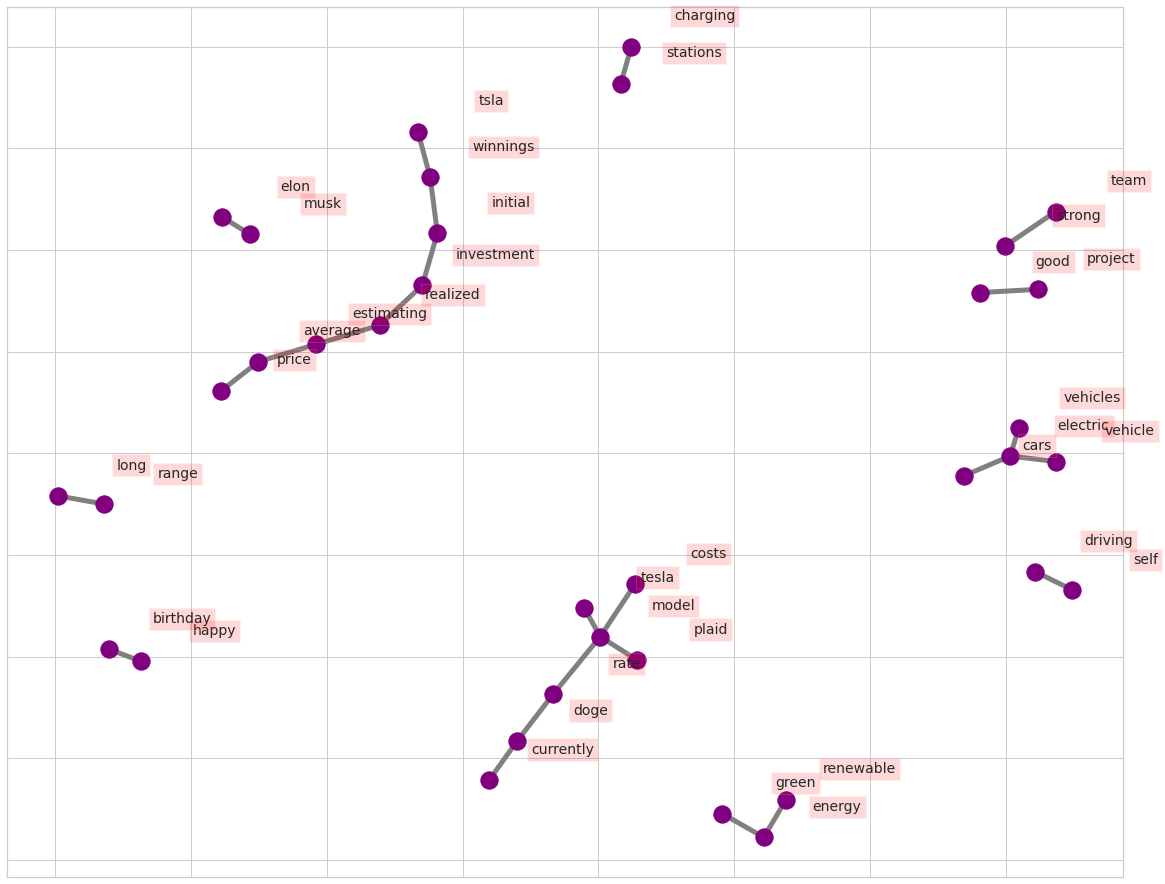

In [19]:
# Create dictionary of bigrams and their counts
d = bigram_df.set_index('bigram').T.to_dict('records')
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 5))

fig, ax = plt.subplots(figsize=(20, 16))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=5,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.065
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.15),
            horizontalalignment='center', fontsize=14)
    
plt.show()

### Bigrams and Trigrams

In [20]:
data = df.no_stop_joined.values.tolist()

In [21]:
print(data[:1])

['join next webinar alternative fuel type transportation sectors well aligned strea']


### Tokenize

In [22]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [23]:
data_words = list(sent_to_words(data))

print(data_words[:1])

[['join', 'next', 'webinar', 'alternative', 'fuel', 'type', 'transportation', 'sectors', 'well', 'aligned', 'strea']]


### Make Bigrams and Trigrams

In [24]:
# Build the bigram and trigram model
bigram = gensim.models.Phrases(data_words, min_count=10, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [25]:
# See trigram example
print(trigram_mod[bigram_mod[data_words[5]]])

['stena', 'line', 'achieves', 'another', 'world', 'first', 'using', 'recycled', 'methanol', 'power', 'ferry', 'stena', 'germanica']


In [26]:
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [27]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words)

### lemmatization

In [28]:
def lemmatization(tweets, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    tweets_out = []
    for sent in tweets:
        doc = nlp(" ".join(sent)) 
        tweets_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return tweets_out

In [29]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

In [30]:
# Do lemmatization keeping only noun, adj, vb, adv
df['lemmatized'] = pd.Series(lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']))

In [31]:
print(df)

                                              Tweet Text  ...                                         lemmatized
0      Join our next webinar on 'Alternative Fuel Typ...  ...  [join, next, webinar, alternative, fuel, type,...
1      RT @events_wisdom: How the #hydrogen productio...  ...  [production, technique, impact, hydrogen, econ...
2      How the #hydrogen production techniques are im...  ...  [production, technique, impact, hydrogen, econ...
3      RT @events_wisdom: Join our upcoming event to ...  ...                      [join, upcoming, event, hear]
4      RT @HELLENICSHIP: Stena Line achieves another ...  ...  [line, achieve, world, first, use, recycle, me...
...                                                  ...  ...                                                ...
36303  RT @NebOair: The UK aviation community is incr...  ...  [aviation, community, incredibly, excite, rapi...
36304  RT @ToyotaMotorCorp: As part of its commitment...  ...  [part, commitment, achieve, neutr

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36308 entries, 0 to 36307
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Tweet Text         36308 non-null  object
 1   Hashtag            32893 non-null  object
 2   Location           25837 non-null  object
 3   tidy_tweet         36308 non-null  object
 4   tidy_tweet_tokens  36308 non-null  object
 5   tokens_no_stop     36308 non-null  object
 6   no_stop_joined     36308 non-null  object
 7   lemmatized         36308 non-null  object
dtypes: object(8)
memory usage: 2.2+ MB


### Stemming

In [33]:
stemmer = PorterStemmer()

In [34]:
df['stemmed'] = df['lemmatized'].apply(lambda x : [stemmer.stem(y) for y in x])

In [35]:
print(df)

                                              Tweet Text  ...                                            stemmed
0      Join our next webinar on 'Alternative Fuel Typ...  ...  [join, next, webinar, altern, fuel, type, tran...
1      RT @events_wisdom: How the #hydrogen productio...  ...  [product, techniqu, impact, hydrogen, economi,...
2      How the #hydrogen production techniques are im...  ...  [product, techniqu, impact, hydrogen, economi,...
3      RT @events_wisdom: Join our upcoming event to ...  ...                         [join, upcom, event, hear]
4      RT @HELLENICSHIP: Stena Line achieves another ...  ...  [line, achiev, world, first, use, recycl, meth...
...                                                  ...  ...                                                ...
36303  RT @NebOair: The UK aviation community is incr...  ...  [aviat, commun, incred, excit, rapidli, develo...
36304  RT @ToyotaMotorCorp: As part of its commitment...  ...  [part, commit, achiev, neutral, r

### Create Dictionary and Corpus

In [36]:
# Create Dictionary
id2word_stemmed = corpora.Dictionary(df['stemmed'])

In [37]:
# Create Dictionary
id2word_lemma = corpora.Dictionary(df['tokens_no_stop'])

In [38]:
# Create Dictionary
id2word_tidy = corpora.Dictionary(df['tidy_tweet_tokens'])

In [39]:
print(id2word_stemmed)

Dictionary(10655 unique tokens: ['align', 'altern', 'fuel', 'join', 'next']...)


In [40]:
print(id2word_lemma)

Dictionary(29568 unique tokens: ['aligned', 'alternative', 'fuel', 'join', 'next']...)


In [41]:
print(id2word_tidy)

Dictionary(29648 unique tokens: ['aligned', 'alternative', 'down', 'fuel', 'join']...)


In [42]:
# Create Corpus
tweets_stemmed = df['stemmed']

In [43]:
df['stemmed'][1]

['product',
 'techniqu',
 'impact',
 'hydrogen',
 'economi',
 'take',
 'look',
 'join',
 'upcom',
 'hydrog']

In [44]:
df['Tweet Text'][1]

'RT @events_wisdom: How the #hydrogen production techniques are impacting the hydrogen economy? Take a look.\nJoin us for our upcoming Hydrog…'

In [45]:
tweets_stemmed

0        [join, next, webinar, altern, fuel, type, tran...
1        [product, techniqu, impact, hydrogen, economi,...
2        [product, techniqu, impact, hydrogen, economi,...
3                               [join, upcom, event, hear]
4        [line, achiev, world, first, use, recycl, meth...
                               ...                        
36303    [aviat, commun, incred, excit, rapidli, develo...
36304    [part, commit, achiev, neutral, recent, open, ...
36305    [regist, interest, travel, appli, help, busi, ...
36306    [car, beginn, guid, altern, zero_emiss, vehicl...
36307    [could, ferrari, fade, background, nois, make,...
Name: stemmed, Length: 36308, dtype: object

In [46]:
# Term Document Frequency
corpus_stemmed = [id2word_stemmed.doc2bow(tweet) for tweet in tweets_stemmed]

In [47]:
print(len(corpus_stemmed))

36308


In [48]:
print(corpus_stemmed[36307])

[(23, 1), (43, 1), (66, 1), (110, 1), (163, 1), (381, 1), (2275, 1), (3123, 1), (6755, 1), (7132, 1)]


In [49]:
# Human readable format of corpus (term-frequency)
[[(id2word_stemmed[id], freq) for id, freq in cp] for cp in corpus_stemmed[:3]]

[[('align', 1),
  ('altern', 1),
  ('fuel', 1),
  ('join', 1),
  ('next', 1),
  ('sector', 1),
  ('strea', 1),
  ('transport', 1),
  ('type', 1),
  ('webinar', 1),
  ('well', 1)],
 [('join', 1),
  ('economi', 1),
  ('hydrog', 1),
  ('hydrogen', 1),
  ('impact', 1),
  ('look', 1),
  ('product', 1),
  ('take', 1),
  ('techniqu', 1),
  ('upcom', 1)],
 [('join', 1),
  ('economi', 1),
  ('hydrogen', 1),
  ('impact', 1),
  ('look', 1),
  ('product', 1),
  ('take', 1),
  ('techniqu', 1),
  ('upcom', 1)]]

### Build the LDA Model

In [50]:
# Build LDA model
lda_model_stemmed = gensim.models.ldamodel.LdaModel(corpus=corpus_stemmed,
                                           id2word=id2word_stemmed,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=15,
                                           alpha='auto',
                                           per_word_topics=True)

In [51]:
pprint(lda_model_stemmed.print_topics())
doc_lda_stemmed = lda_model_stemmed[corpus_stemmed]

[(0,
  '0.065*"take" + 0.060*"car" + 0.042*"know" + 0.034*"think" + '
  '0.033*"hydrogen" + 0.028*"much" + 0.025*"human" + 0.024*"creat" + '
  '0.023*"get" + 0.023*"join"'),
 (1,
  '0.044*"go" + 0.039*"part" + 0.035*"plaid" + 0.030*"say" + 0.029*"work" + '
  '0.027*"busi" + 0.023*"commit" + 0.021*"realli" + 0.021*"bu" + '
  '0.020*"thing"'),
 (2,
  '0.036*"time" + 0.035*"rate" + 0.032*"travel" + 0.030*"batteri" + '
  '0.029*"free" + 0.025*"great" + 0.022*"test" + 0.021*"deliveri" + '
  '0.020*"interest" + 0.019*"recent"'),
 (3,
  '0.077*"make" + 0.040*"want" + 0.034*"need" + 0.027*"late" + 0.020*"next" + '
  '0.020*"start" + 0.018*"last" + 0.018*"bitcoin" + 0.016*"sign" + '
  '0.016*"link"'),
 (4,
  '0.034*"develop" + 0.034*"compani" + 0.033*"good" + 0.030*"check" + '
  '0.030*"come" + 0.027*"technolog" + 0.022*"peopl" + 0.021*"market" + '
  '0.020*"stock" + 0.020*"truck"'),
 (5,
  '0.051*"vehicl" + 0.037*"could" + 0.035*"tesla" + 0.035*"year" + '
  '0.033*"electr" + 0.028*"launch" + 0

### Model Perplexity and Coherence Score

In [52]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_stemmed.log_perplexity(corpus_stemmed))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda_stemmed = CoherenceModel(model=lda_model_stemmed, texts=df['stemmed'], dictionary=id2word_stemmed, coherence='c_v')
coherence_lda_stemmed = coherence_model_lda_stemmed.get_coherence()
print('\nCoherence Score: ', coherence_lda_stemmed)


Perplexity:  -8.92824317326566

Coherence Score:  0.4156385579071147


In [53]:
lda_model_stemmed.save('gensim_model.gensim')

### Mallet Wrapper

In [54]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip

--2021-08-07 14:31:49--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  9.80MB/s    in 1.6s    

2021-08-07 14:31:51 (9.80 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]



In [55]:
!unzip mallet-2.0.8.zip

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classify  
  inflating: mallet-2.0.8/bin/text2vectors  
  inflating: mallet-2.0.8/bin/vectors2classify  
  inflating: mallet-2.0.8/bin/vectors2info  
  inflating: mallet-2.0.8/bin/vectors2topics  
  inflating: mallet-2.0.8/bin/vectors2vectors  
  inflating: mallet-2.0.8/build.xml  
   creating: mallet-2.0.8/class/
   creating: mallet-2.0.8/class/cc/
   creating: mallet-2.0.8/class/cc/mallet/
   creating: mallet-2.0.8/class/cc/mallet/classify/
  inflating: mallet-2.0.8/class/cc/mallet/classify/AdaBoost.class  
  in

In [56]:
mallet_path = '/content/mallet-2.0.8/bin/mallet'

In [57]:
num_topics = 8
ldamallet_stemmed = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus_stemmed, num_topics=num_topics, id2word=id2word_stemmed)

In [58]:
# Show Topics
pprint(ldamallet_stemmed.show_topics(formatted=False))

[(0,
  [('energi', 0.06054619981233641),
   ('power', 0.043360165934120204),
   ('product', 0.0350140747691244),
   ('green', 0.02553212504321201),
   ('technolog', 0.024939503185342486),
   ('solar', 0.023606104005136058),
   ('peopl', 0.022470245444219467),
   ('design', 0.018223122129487877),
   ('industri', 0.016790952639636526),
   ('system', 0.016741567484814066)]),
 (1,
  [('price', 0.018453816249200335),
   ('free', 0.017518822892574185),
   ('plant', 0.01619014812263176),
   ('becom', 0.015747256532650952),
   ('home', 0.014763052999360267),
   ('share', 0.014467791939373063),
   ('base', 0.013680429112740514),
   ('today', 0.01328674769942424),
   ('video', 0.01304069681610157),
   ('offer', 0.012843856109443432)]),
 (2,
  [('time', 0.03714839961202716),
   ('market', 0.030019398642095053),
   ('launch', 0.018186226964112512),
   ('week', 0.01770126091173618),
   ('soap', 0.015324927255092144),
   ('larg', 0.015033947623666343),
   ('follow', 0.012997090203685741),
   ('natur

In [59]:
# Compute Coherence Score
coherence_model_ldamallet_stemmed = CoherenceModel(model=ldamallet_stemmed, texts=df['stemmed'], dictionary=id2word_stemmed, coherence='c_v')
coherence_ldamallet_stemmed = coherence_model_ldamallet_stemmed.get_coherence()
print('\nCoherence Score (Stemmed): ', coherence_ldamallet_stemmed)


Coherence Score (Stemmed):  0.33543149342886525


### Visualize with pyLDAvis

In [60]:
# Visualize the topics
pyLDAvis.enable_notebook()


In [61]:
visualisation = gensimvis.prepare(lda_model_stemmed,corpus_stemmed,id2word_stemmed)

In [62]:
visualisation

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.385896 -0.023631       1        1  12.985852
6      0.015288  0.021053       2        1  10.925440
8      0.022778  0.044533       3        1  10.819947
2      0.078970  0.251668       4        1  10.325748
3      0.040351 -0.001022       5        1  10.289798
5      0.029941  0.015608       6        1   9.957094
1      0.041053  0.005530       7        1   9.495567
9      0.098057 -0.314918       8        1   9.135037
7      0.023494  0.011658       9        1   8.766947
0      0.035964 -0.010478      10        1   7.298571, topic_info=           Term         Freq        Total Category  logprob  loglift
115       model  2065.000000  2065.000000  Default  30.0000  30.0000
43         make  1438.000000  1438.000000  Default  29.0000  29.0000
23        first  1336.000000  1336.000000  Default  28.0000  28.0000
17         take   862.000000   862.000000  Default  27.0000  27.0000
26        power   994.000000   994.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
1534  autopilot    83.995155    84.893640  Topic10  -5.0553   2.6069
1680     scienc    81.777582    82.676513  Topic10  -5.0820   2.6066
4117      token    75.769497    76.667571  Topic10  -5.1584   2.6057
1695     return    74.639290    75.537663  Topic10  -5.1734   2.6055
510       refin    90.001301   229.892270  Topic10  -4.9862   1.6797

[335 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2376      6  0.997193      accept
22        2  0.998542      achiev
760       6  0.988571      action
50        3  0.996337       allow
1148      7  0.990667     alreadi
...     ...       ...         ...
1064      8  0.992812       worth
130       8  0.998269       would
1277      8  0.995687       write
627       6  0.998465        year
2857      6  0.998509  zero_emiss

[324 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 7, 9, 3, 4, 6, 2, 10, 8, 1])

In [63]:
pyLDAvis.save_html(visualisation, 'lda.html')

### find optimal number of topics

In [64]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus_stemmed, num_topics=num_topics, id2word=id2word_stemmed)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [65]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word_stemmed, corpus=corpus_stemmed, texts=df['stemmed'], start=2, limit=26, step=3)

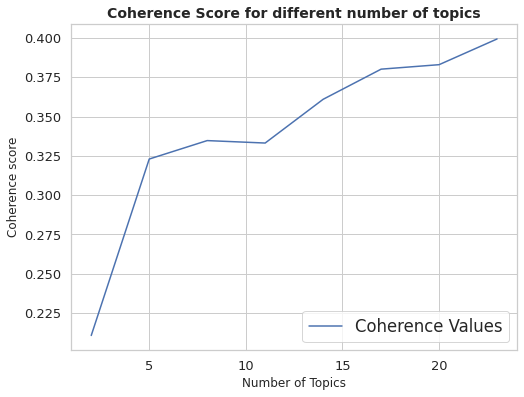

In [66]:
# Show graph
limit=26; start=2; step=3;
x = range(start, limit, step)
plt.figure(figsize=(8,6))
plt.plot(x, coherence_values)
plt.title('Coherence Score for different number of topics', fontsize=14, fontweight="bold")
plt.xlabel("Number of Topics", fontsize=12)
plt.ylabel("Coherence score", fontsize=12)
plt.tick_params(axis='both', labelsize=13)
plt.legend(["Coherence Values"], loc='lower right')
plt.show()

In [67]:
# Print the coherence scores for different number of topics
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.2108
Num Topics = 5  has Coherence Value of 0.323
Num Topics = 8  has Coherence Value of 0.3347
Num Topics = 11  has Coherence Value of 0.3332
Num Topics = 14  has Coherence Value of 0.361
Num Topics = 17  has Coherence Value of 0.3802
Num Topics = 20  has Coherence Value of 0.383
Num Topics = 23  has Coherence Value of 0.3994


### Optimal Model

In [68]:
# Select the model and print the topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.036*"product" + 0.036*"today" + 0.024*"check" + 0.022*"love" + '
  '0.022*"sustain" + 0.018*"stock" + 0.018*"design" + 0.018*"support" + '
  '0.017*"live" + 0.015*"home"'),
 (1,
  '0.080*"electr" + 0.067*"vehicl" + 0.039*"car" + 0.035*"batteri" + '
  '0.035*"year" + 0.023*"plan" + 0.018*"price" + 0.018*"sale" + 0.018*"sell" + '
  '0.018*"announc"'),
 (2,
  '0.116*"project" + 0.062*"good" + 0.050*"great" + 0.047*"team" + '
  '0.036*"futur" + 0.031*"work" + 0.027*"develop" + 0.018*"strong" + '
  '0.017*"realli" + 0.017*"interest"'),
 (3,
  '0.053*"model" + 0.043*"power" + 0.034*"drive" + 0.033*"world" + '
  '0.021*"build" + 0.020*"rang" + 0.017*"system" + 0.017*"creat" + '
  '0.016*"plant" + 0.015*"rate"'),
 (4,
  '0.038*"time" + 0.022*"read" + 0.020*"start" + 0.017*"free" + 0.016*"chang" '
  '+ 0.014*"back" + 0.012*"call" + 0.012*"space" + 0.012*"move" + '
  '0.011*"truck"'),
 (5,
  '0.059*"energi" + 0.029*"market" + 0.026*"join" + 0.025*"green" + '
  '0.024*"technolog" + 0.02

### Dominant Topic

In [69]:
def format_topics_sentences(ldamodel=ldamallet_stemmed, corpus=corpus_stemmed, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each documen
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus_stemmed, texts=df['stemmed'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(15)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,5.0,0.1624,"energi, market, join, green, technolog, invest...","[join, next, webinar, altern, fuel, type, tran..."
1,1,0.0,0.1767,"product, today, check, love, sustain, stock, d...","[product, techniqu, impact, hydrogen, economi,..."
2,2,5.0,0.1681,"energi, market, join, green, technolog, invest...","[product, techniqu, impact, hydrogen, economi,..."
3,3,5.0,0.1713,"energi, market, join, green, technolog, invest...","[join, upcom, event, hear]"
4,4,6.0,0.1572,"make, peopl, friendli, mani, tesla, life, happ...","[line, achiev, world, first, use, recycl, meth..."
5,5,6.0,0.1612,"make, peopl, friendli, mani, tesla, life, happ...","[line, achiev, world, first, use, recycl, meth..."
6,6,5.0,0.1713,"energi, market, join, green, technolog, invest...","[join, upcom, event, hear]"
7,7,0.0,0.1500,"product, today, check, love, sustain, stock, d...","[statu, cement, product, utilis, lack]"
8,8,7.0,0.1798,"charg, compani, solar, find, share, launch, bu...","[bu, offici, launch, hit, capit, street, fit]"
9,9,1.0,0.1617,"electr, vehicl, car, batteri, year, plan, pric...","[region, transport, bodi, outlin, plan, altern..."


In [70]:
df_dominant_topic[df_dominant_topic.Dominant_Topic == 7.0]

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
8,8,7.0,0.1798,"charg, compani, solar, find, share, launch, bu...","[bu, offici, launch, hit, capit, street, fit]"
21,21,7.0,0.1557,"charg, compani, solar, find, share, launch, bu...","[launch, next, month, sportback]"
29,29,7.0,0.1557,"charg, compani, solar, find, share, launch, bu...","[launch, next, month, sportback]"
40,40,7.0,0.1587,"charg, compani, solar, find, share, launch, bu...","[launch, point]"
44,44,7.0,0.1587,"charg, compani, solar, find, share, launch, bu...","[launch, point]"
...,...,...,...,...,...
36271,36271,7.0,0.1500,"charg, compani, solar, find, share, launch, bu...","[build, abl, refuel, hour, hydrogen]"
36272,36272,7.0,0.1500,"charg, compani, solar, find, share, launch, bu...","[expand, oper, station, today, serv]"
36283,36283,7.0,0.1623,"charg, compani, solar, find, share, launch, bu...","[program, includ, hydrogen, hub, refuel, stati..."
36285,36285,7.0,0.1330,"charg, compani, solar, find, share, launch, bu...","[replac, tradit, taxi, vehicl, goal, gradual, ..."


### Total Topic Distrubution across documents 

In [71]:
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic_contribution = topic_contribution.rename_axis('Dominant_Topic').reset_index(name='percentage')

topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']].drop_duplicates()
topic_num_keywords.index = range(len(topic_num_keywords))

df_dominant_topics = pd.merge(topic_contribution, topic_num_keywords, how='inner', on='Dominant_Topic')
df_dominant_topics

,Dominant_Topic,percentage,Topic_Keywords
0,0.0,0.2411,"product, today, check, love, sustain, stock, d..."
1,1.0,0.1464,"electr, vehicl, car, batteri, year, plan, pric..."
2,3.0,0.1151,"model, power, drive, world, build, rang, syste..."
3,2.0,0.1077,"project, good, great, team, futur, work, devel..."
4,5.0,0.1014,"energi, market, join, green, technolog, invest..."
5,4.0,0.1011,"time, read, start, free, chang, back, call, sp..."
6,6.0,0.0977,"make, peopl, friendli, mani, tesla, life, happ..."
7,7.0,0.0895,"charg, compani, solar, find, share, launch, bu..."


In [72]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.2336,"product, today, check, love, sustain, stock, d...","[home, grow, flower, leav, gift, doorstep, nic..."
1,1.0,0.2536,"electr, vehicl, car, batteri, year, plan, pric...","[bicycl, rider, conk, car, door, suddenli, swi..."
2,2.0,0.3081,"project, good, great, team, futur, work, devel...","[unscent, soap, sensit, skin, soap, cold_proce..."
3,3.0,0.2585,"model, power, drive, world, build, rang, syste...","[camp, weekend, notic, neighbor, camp, style, ..."
4,4.0,0.2415,"time, read, start, free, chang, back, call, sp...","[use, storag, space, add, variabl, time, verif..."
5,5.0,0.2566,"energi, market, join, green, technolog, invest...","[use, renew, energi, gener, energi, produc, gr..."
6,6.0,0.2720,"make, peopl, friendli, mani, tesla, life, happ...","[portabl, reusabl, bamboo, fiber, coffe, cup, ..."
7,7.0,0.2356,"charg, compani, solar, find, share, launch, bu...","[regard, charg, infrastructur, spend, taxpay, ..."


In [73]:
print(sent_topics_sorteddf_mallet['Text'][6])

['portabl', 'reusabl', 'bamboo', 'fiber', 'coffe', 'cup', 'friendli', 'make', 'bamboo', 'corn', 'stalk', 'fiber', 'resin']


In [74]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = sent_topics_sorteddf_mallet[['Topic_Num', 'Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts.sort_index(), topic_contribution.sort_index()], axis=1)

# Change Column names
df_dominant_topics.columns = ['Topic', 'Topic_Keywords', 'Num_Tweets', 'Perc_Tweets']

# Show
df_dominant_topics['Perc_Tweets'] = df_dominant_topics['Perc_Tweets'] * 100

In [75]:
df_dominant_topics['Text'] = sent_topics_sorteddf_mallet['Text']

In [76]:
df_dominant_topics

,Topic,Topic_Keywords,Num_Tweets,Perc_Tweets,Text
0.0,0.0,"product, today, check, love, sustain, stock, d...",8755,24.11,"[home, grow, flower, leav, gift, doorstep, nic..."
1.0,1.0,"electr, vehicl, car, batteri, year, plan, pric...",5316,14.64,"[bicycl, rider, conk, car, door, suddenli, swi..."
2.0,2.0,"project, good, great, team, futur, work, devel...",3910,10.77,"[unscent, soap, sensit, skin, soap, cold_proce..."
3.0,3.0,"model, power, drive, world, build, rang, syste...",4180,11.51,"[camp, weekend, notic, neighbor, camp, style, ..."
4.0,4.0,"time, read, start, free, chang, back, call, sp...",3671,10.11,"[use, storag, space, add, variabl, time, verif..."
5.0,5.0,"energi, market, join, green, technolog, invest...",3682,10.14,"[use, renew, energi, gener, energi, produc, gr..."
6.0,6.0,"make, peopl, friendli, mani, tesla, life, happ...",3546,9.77,"[portabl, reusabl, bamboo, fiber, coffe, cup, ..."
7.0,7.0,"charg, compani, solar, find, share, launch, bu...",3248,8.95,"[regard, charg, infrastructur, spend, taxpay, ..."


Total Tweets 36308


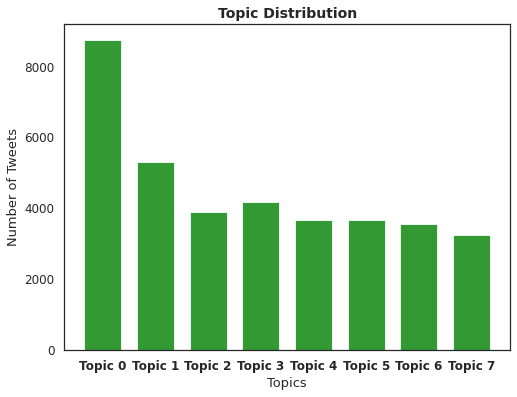

In [77]:
sns.set_style("white")
label = ['Topic 0', 'Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6', 'Topic 7']
freq = df_dominant_topics['Num_Tweets']
index = np.arange(len(freq))

print("Total Tweets", df_dominant_topics['Num_Tweets'].sum())
plt.figure(figsize=(8,6), facecolor='white')
plt.bar(index, freq, alpha=0.8, color= 'green', width=0.7)
plt.xlabel('Topics', fontsize=13)
plt.ylabel('Number of Tweets', fontsize=13)
plt.xticks(index, label, fontsize=11, fontweight="bold")
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title('Topic Distribution', fontsize=14, fontweight="bold")
plt.show()

### Save Results

In [78]:
df_dominant_topics.to_pickle('/content/drive/MyDrive/Capstone_electriccar/topic_modelling_gensim_results.pkl')